0
1
2
Saving as  posterior_linmix_AC_Shen2011_tau.png
0
1
2
Saving as  posterior_linmix_AC_Shen2011_SF.png


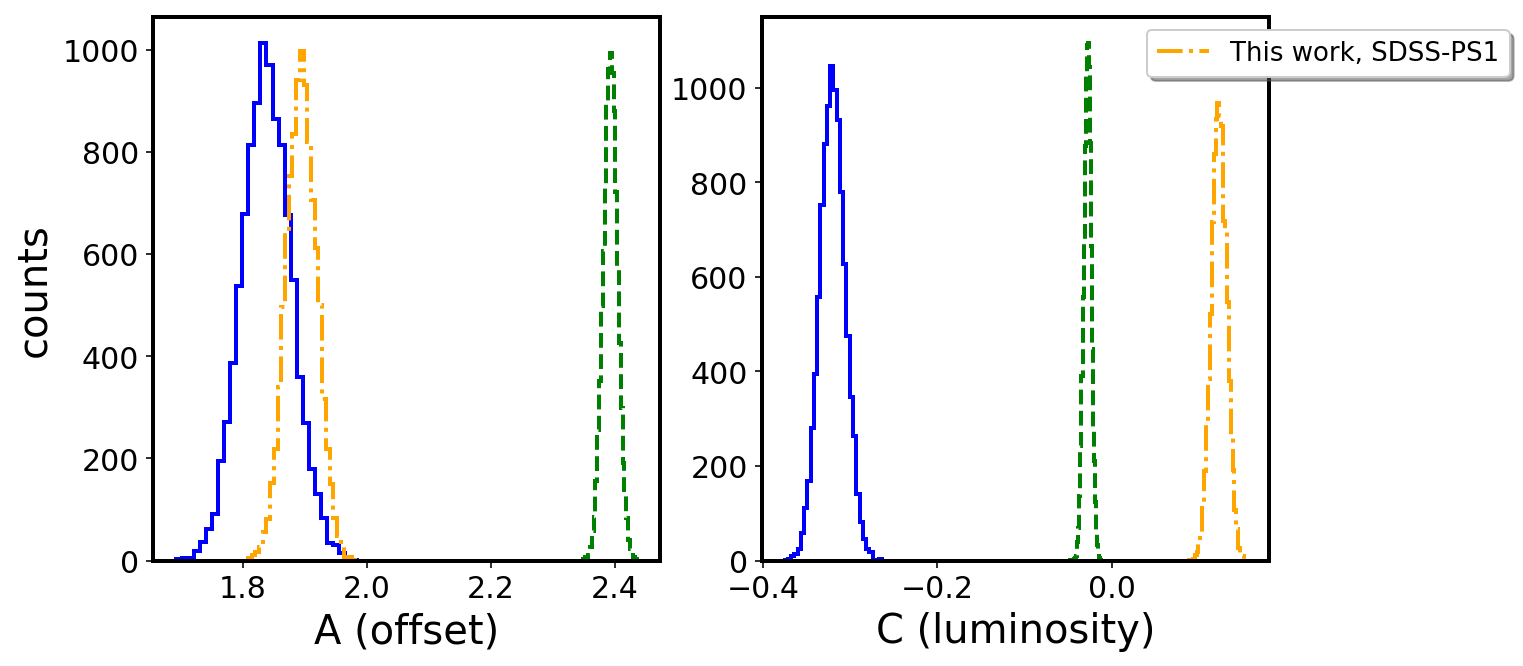

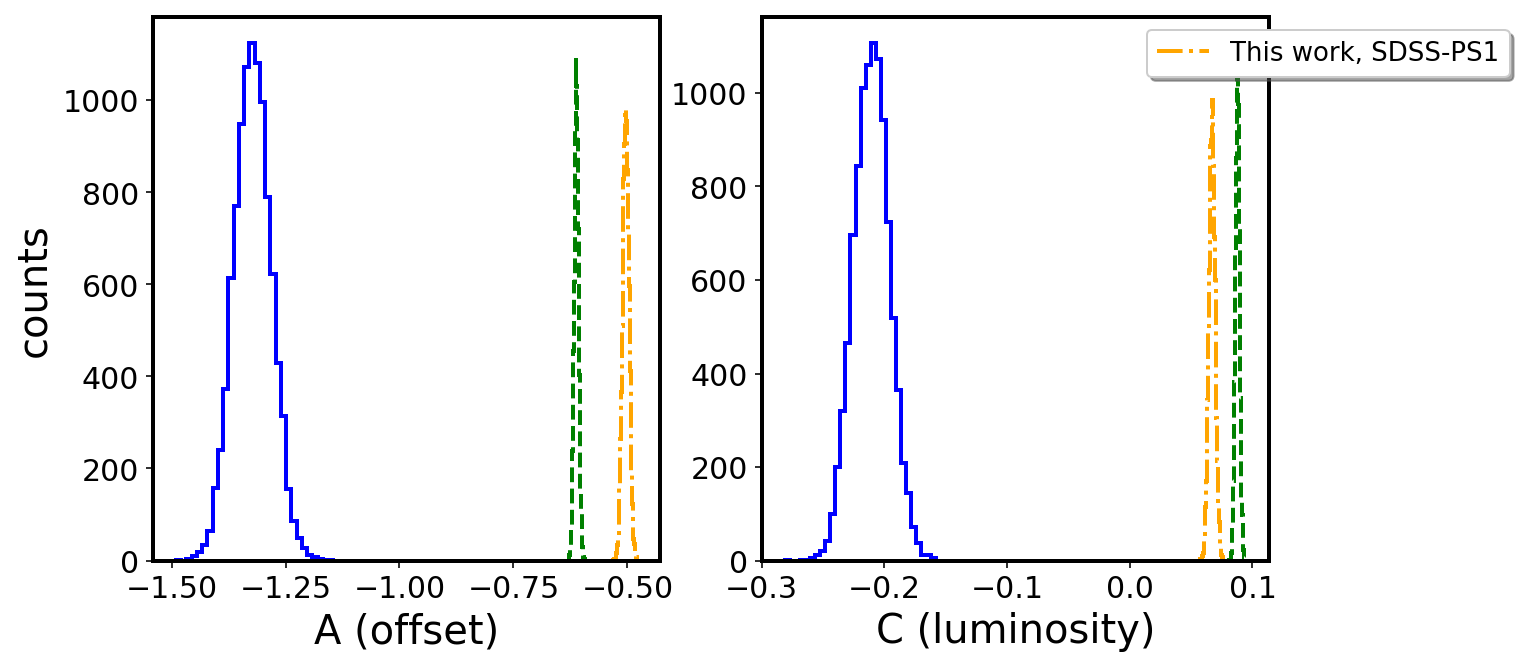

In [19]:
import linmix
import numpy as np 
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.table import Table
from astropy.table import vstack
from astropy.table import Column
import os
import scipy
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18



import matplotlib.lines as mlines
%matplotlib inline
%config InlineBackend.figure_format='retina'
band = 3 

par = 'SF'#'tau' #  'SF' # \tau

cols = ['MAP_chelsea', 'EXP_sdss', 'EXP_sdss-ps1']
colors= ['blue','green', 'orange',  'red']
ls = ['solid' , 'dashed', 'dashdot', 'dotted',  ]
labels = ['M10, SDSS', 'This work, SDSS', 'This work, SDSS-PS1']
lw=2
nbins = 30
name = 'tau'

for name in ['tau', 'SF'] : 
    fig,  ax = plt.subplots(1,2,figsize=(10,5))
    ax_legend_handles = [] 
    for i in range(len(cols)):
        print(i)
        pre = 'Shen2011'
        f = 'coeff_'+name+'_linmix_3_'+pre+'_'+cols[i]+'.npy'
        A=[]; C=[]; D=[]
        ax_legend_handles = [] 
        lm1 = np.load(f)
        A = lm1['alpha']
        C = lm1['beta']
        ax[0].hist(A,histtype='step',color=colors[i],lw= lw,
                   ls=ls[i],bins=nbins)
        ax[1].hist(C,histtype='step',color=colors[i],lw=lw ,
                   ls=ls[i],bins=nbins)

        line = mlines.Line2D([], [],  color=colors[i], label=labels[i],lw=2,
                            ls=ls[i])
        ax_legend_handles.append(line)

    ax[1].legend(loc='upper right', handles = ax_legend_handles,
                 bbox_to_anchor=(1.5, 1.0),
                 ncol=1, fancybox=True, shadow=True, fontsize=13 )

    ax[0].set_xlabel('A (offset)')
    ax[1].set_xlabel('C (luminosity)')
    ax[0].set_ylabel('counts')
    figname  = 'posterior_linmix_AC_'+pre+'_'+name+'.png'
    print('Saving as ', figname)
    plt.savefig(figname, bbox_inches='tight',dpi=100)

In [15]:
cols

['MAP_chelsea', 'EXP_sdss', 'EXP_sdss-ps1']